In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split


In [2]:
BASE_DIR=('/Users/ishanrawat/CnnModel/chest_xray/')
train_dir=os.path.join(BASE_DIR,'train/')
val_dir=os.path.join(BASE_DIR,'val/')
test_dir=os.path.join(BASE_DIR,'test/')

print('Number of images in training set = ',str(len(glob(train_dir+'*/*'))))
print('Number of images in validation set = ',str(len(glob(val_dir+'*/*'))))
print('Number of images in testing set = ',str(len(glob(test_dir+'*/*'))))

Number of images in training set =  5216
Number of images in validation set =  16
Number of images in testing set =  624


In [3]:
training_images = tf.io.gfile.glob('/Users/ishanrawat/CnnModel/chest_xray/train/*/*')
validation_images = tf.io.gfile.glob('/Users/ishanrawat/CnnModel/chest_xray/val/*/*')


total_files = training_images
total_files.extend(validation_images)
print(f'Total number of images : training_images + validation_images = {len(total_files)}\n')

#spliting 80:20
train_images, val_images = train_test_split(total_files, test_size = 0.2)
print(f'After division of 80:20')
print(f'Total number of training images = {len(train_images)}')
print(f'Total number of validation images = {len(val_images)}')

Total number of images : training_images + validation_images = 5232

After division of 80:20
Total number of training images = 4185
Total number of validation images = 1047


In [6]:

tf.io.gfile.makedirs('/Users/ishanrawat/CnnModel/working/val_dataset/NORMAL/')
tf.io.gfile.makedirs('/Users/ishanrawat/CnnModel/working/val_dataset/PNEUMONIA/')
tf.io.gfile.makedirs('/Users/ishanrawat/CnnModel/working/train_dataset/NORMAL/')
tf.io.gfile.makedirs('/Users/ishanrawat/CnnModel/working/train_dataset/PNEUMONIA/')

In [7]:
for ele in train_images:
    parts_of_path = ele.split('/')

    if 'PNEUMONIA' == parts_of_path[-2]:
        tf.io.gfile.copy(src = ele, dst = '/Users/ishanrawat/CnnModel/working/train_dataset/PNEUMONIA/' +  parts_of_path[-1])
    else:
        tf.io.gfile.copy(src = ele, dst = '/Users/ishanrawat/CnnModel/working/train_dataset/NORMAL/' +  parts_of_path[-1])

In [8]:
for ele in val_images:
    parts_of_path = ele.split('/')

    if 'PNEUMONIA' == parts_of_path[-2]:
        tf.io.gfile.copy(src = ele, dst = '/Users/ishanrawat/CnnModel/working/val_dataset/PNEUMONIA/' +  parts_of_path[-1])
    else:
        tf.io.gfile.copy(src = ele, dst = '/Users/ishanrawat/CnnModel/working/val_dataset/NORMAL/' +  parts_of_path[-1])

In [9]:

print('Pneumonia x-ray images in training set after split = ',len(os.listdir('/Users/ishanrawat/CnnModel/working/train_dataset/PNEUMONIA/')))

print('Normal x-ray images in training set after split = ',len(os.listdir('/Users/ishanrawat/CnnModel/working/train_dataset/NORMAL/')))

print('Pneumonia x-ray images in validation set after split = ',len(os.listdir('/Users/ishanrawat/CnnModel/working/val_dataset/PNEUMONIA/')))

print('Normal x-ray images in validation set after split = ',len(os.listdir('/Users/ishanrawat/CnnModel/working/val_dataset/NORMAL/')))

print('Pneumonia x-ray images in test set = ',len(os.listdir('/Users/ishanrawat/CnnModel/chest_xray/test/PNEUMONIA/')))

print('Normal x-ray images in test set = ',len(os.listdir('/Users/ishanrawat/CnnModel/chest_xray/test/NORMAL')))



Pneumonia x-ray images in training set after split =  3128
Normal x-ray images in training set after split =  1057
Pneumonia x-ray images in validation set after split =  755
Normal x-ray images in validation set after split =  292
Pneumonia x-ray images in test set =  390
Normal x-ray images in test set =  234


In [10]:
train_dir='/Users/ishanrawat/CnnModel/working/train_dataset/'
val_dir='/Users/ishanrawat/CnnModel/working/val_dataset/'
test_dir='/Users/ishanrawat/CnnModel/chest_xray/test/'

train_normal_dir='/Users/ishanrawat/CnnModel/working/train_dataset/NORMAL'
train_pneumonia_dir='/Users/ishanrawat/CnnModel/working/train_dataset/PNEUMONIA'
val_normal_dir='/Users/ishanrawat/CnnModel/working/val_dataset/NORMAL'
val_pneumonia_dir='/Users/ishanrawat/CnnModel/working/val_dataset/PNEUMONIA'

In [11]:
# train_normal_fnames=os.listdir(train_normal_dir)
# train_pneumonia_fnames=os.listdir(train_pneumonia_dir)

# print(train_normal_fnames[:10])
# print(train_pneumonia_fnames[:10])


['NORMAL2-IM-0927-0001.jpeg', 'NORMAL2-IM-1056-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'IM-0656-0001-0001.jpeg', 'NORMAL2-IM-1110-0001.jpeg', 'IM-0757-0001.jpeg', 'NORMAL2-IM-1326-0001.jpeg', 'NORMAL2-IM-0736-0001.jpeg', 'NORMAL2-IM-0500-0001.jpeg', 'NORMAL2-IM-0393-0001.jpeg']
['person63_bacteria_306.jpeg', 'person1438_bacteria_3721.jpeg', 'person661_bacteria_2553.jpeg', 'person1214_bacteria_3166.jpeg', 'person1353_virus_2333.jpeg', 'person26_bacteria_122.jpeg', 'person124_virus_238.jpeg', 'person1619_bacteria_4261.jpeg', 'person1514_bacteria_3964.jpeg', 'person1491_bacteria_3893.jpeg']


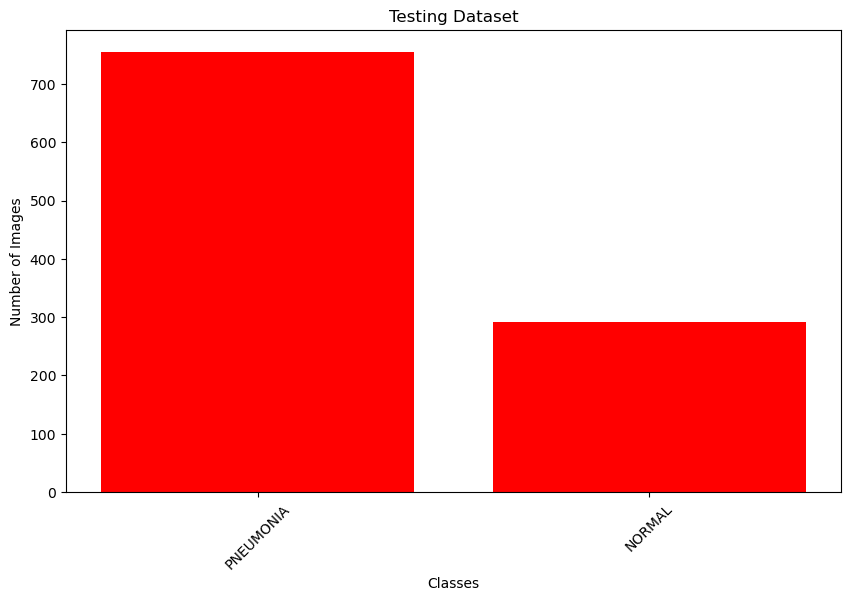

In [52]:
import os
import matplotlib.pyplot as plt

# Function to count images in each class
def count_images_per_class(directory):
    class_names = []
    num_images_per_class = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        # Skip if not a directory
        if not os.path.isdir(class_dir):
            continue
        num_images = len(os.listdir(class_dir))
        class_names.append(class_name)
        num_images_per_class.append(num_images)
    return class_names, num_images_per_class

# Visualize dataset distribution using bar chart
def visualize_dataset_distribution(directory):
    class_names, num_images_per_class = count_images_per_class(directory)
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, num_images_per_class, color='red')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Testing Dataset')
    plt.xticks(rotation=45)
    plt.savefig('Test.svg')
    plt.show()


# Visualize validation dataset distribution
visualize_dataset_distribution(val_dir)



In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

no_cols=4
no_rows=4

pic_index=0

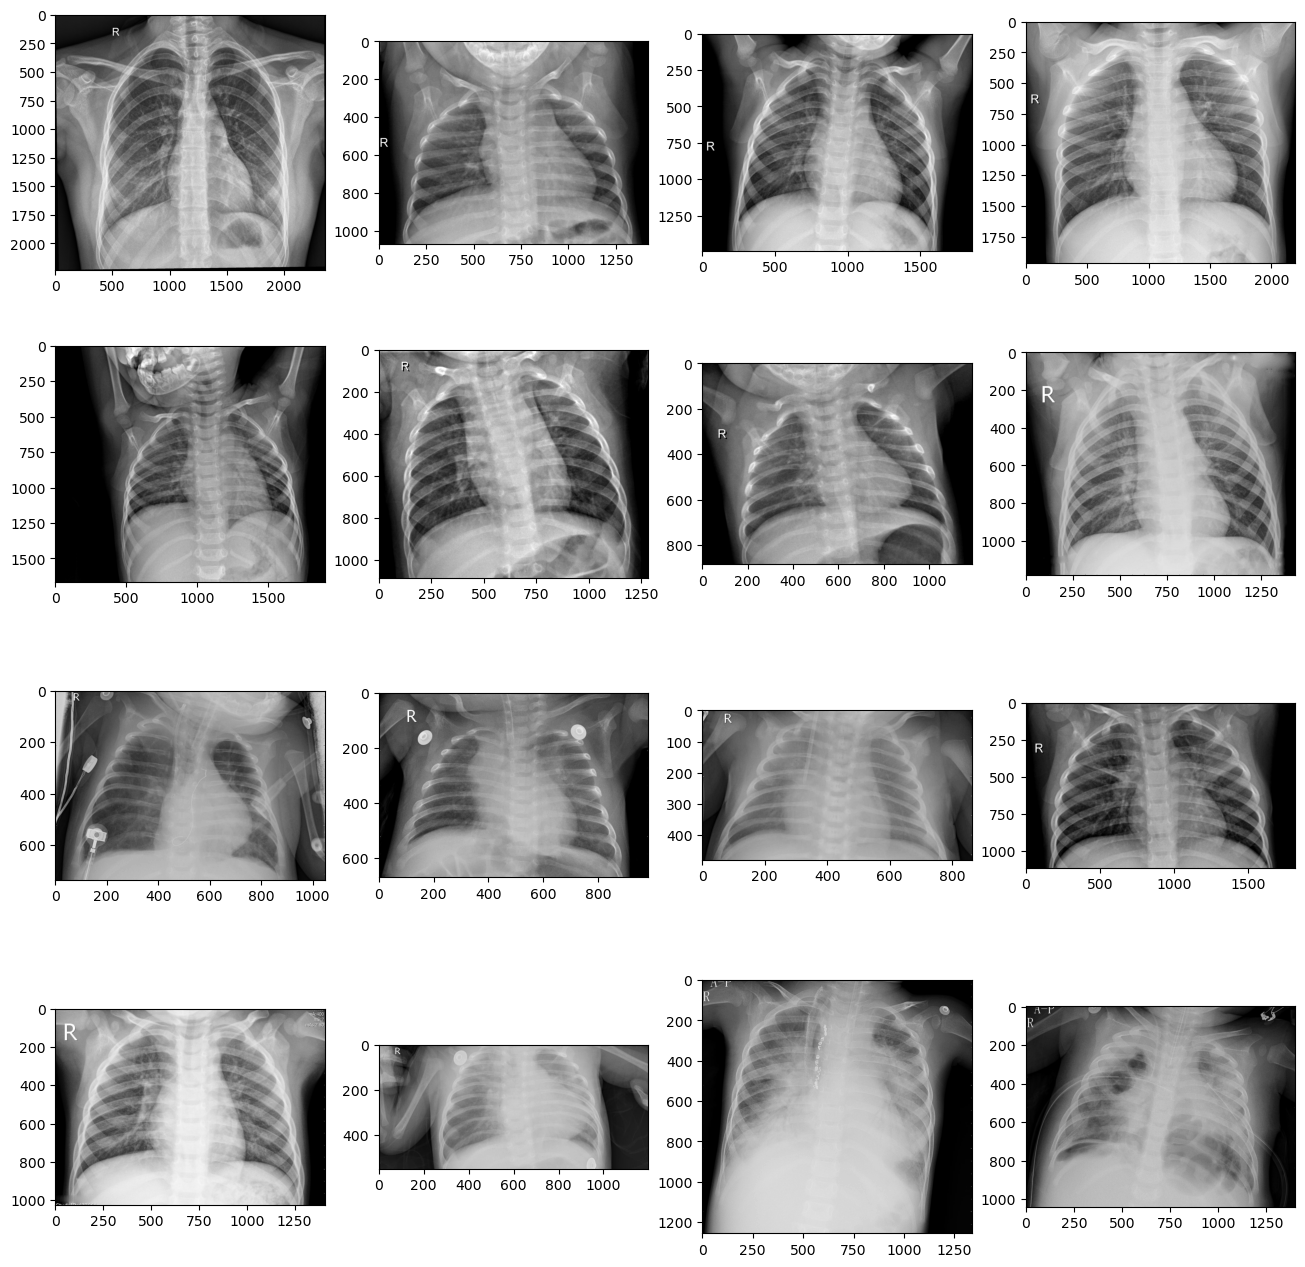

In [13]:

fig=plt.gcf()
fig.set_size_inches(no_cols*4,no_rows*4)

pic_index+=8

normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
pneumonia_pix=[os.path.join(train_pneumonia_dir,fname) for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(normal_pix+pneumonia_pix):
    sp=plt.subplot(no_rows,no_cols,i+1)
    sp.axis()
    
    img=mpimg.imread(img_path)
    plt.imshow(img,cmap='gray')
    
plt.show()

# first 8 images are normal x-ray images and next 8 images are pnemonia x-ray images

In [14]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917,377 (3.50 MB)

 Trainable params: 917,377 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

Found 4185 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
# As this is the case of medical diagnosis accuracy cannot be the oly metric to evaluate.
# In medical daignosis it is very important to correctly predict the true values.
# We cannot incorrectly diagnose a patient as normal event after the true report of
#diagnosis shows that patient has pnemonia.
# So along with higher accuracy we need higher recall.
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the best model
checkpoint = ModelCheckpoint("best_model.keras", 
                             monitor='val_accuracy',   # Monitor validation accuracy
                             verbose=1, 
                             save_best_only=True,     # Save only the best model
                             mode='max'               # Save the model when validation accuracy improves
                            )

# Train the model with the defined callback
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=30,
                    verbose=2,
                    callbacks=[checkpoint]   # Pass the checkpoint callback
                   )


Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.72111, saving model to best_model.keras
33/33 - 35s - 1s/step - Precision: 0.7478 - Recall: 0.9393 - accuracy: 0.7178 - loss: 0.6071 - val_Precision: 0.7211 - val_Recall: 1.0000 - val_accuracy: 0.7211 - val_loss: 0.5981
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.72111
33/33 - 34s - 1s/step - Precision: 0.7474 - Recall: 1.0000 - accuracy: 0.7474 - loss: 0.5699 - val_Precision: 0.7211 - val_Recall: 1.0000 - val_accuracy: 0.7211 - val_loss: 0.5934
Epoch 3/30

Epoch 3: val_accuracy improved from 0.72111 to 0.72397, saving model to best_model.keras
33/33 - 34s - 1s/step - Precision: 0.7505 - Recall: 0.9779 - accuracy: 0.7405 - loss: 0.5205 - val_Precision: 0.7240 - val_Recall: 0.9974 - val_accuracy: 0.7240 - val_loss: 0.5322
Epoch 4/30

Epoch 4: val_accuracy improved from 0.72397 to 0.75931, saving model to best_model.keras
33/33 - 35s - 1s/step - Precision: 0.7916 - Recall: 0.9012 - accuracy: 0.7489 - loss: 0.4624 - val_Precision

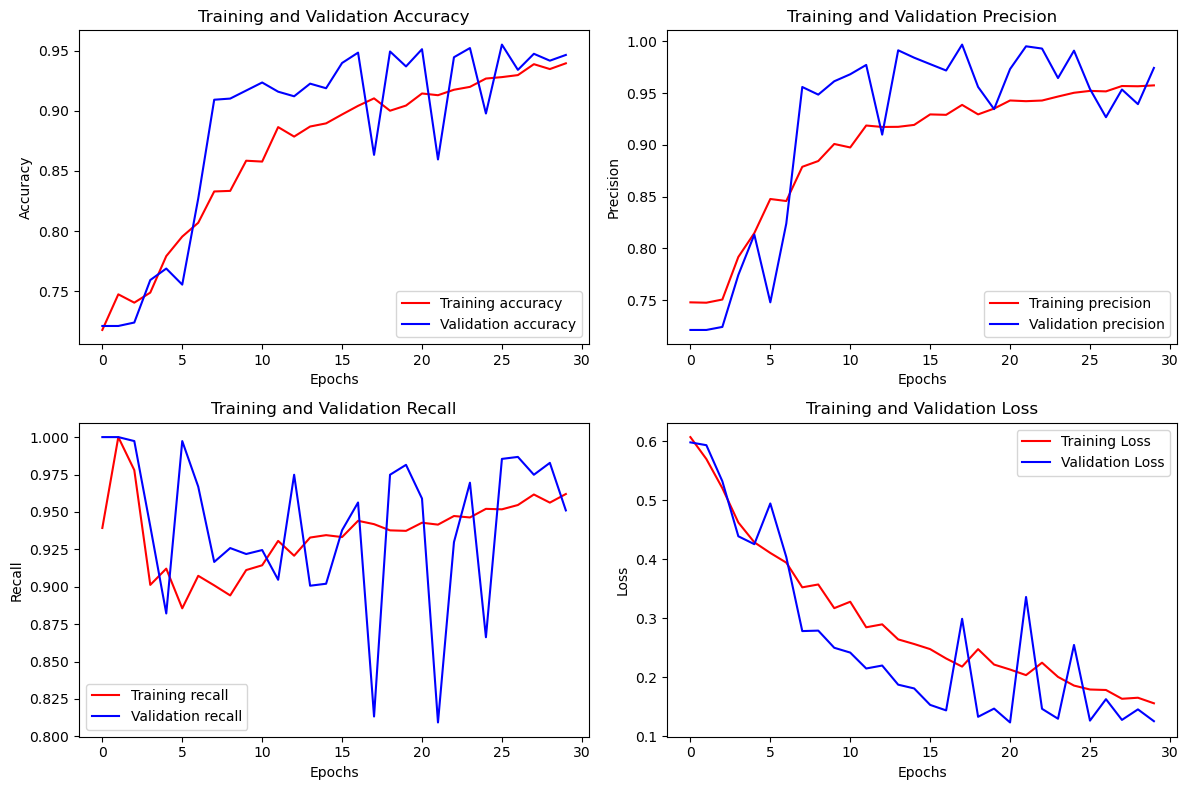

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_precision = history.history['Precision']
val_precision = history.history['val_Precision']

train_recall = history.history['Recall']
val_recall = history.history['val_Recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, train_precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('Graph.svg')
plt.show()


In [20]:
eval_result1 = model.evaluate(test_generator, steps=624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.8621 - Recall: 0.9923 - accuracy: 0.8960 - loss: 0.3123    
loss  : 0.31267738342285156
accuracy  : 0.8958333134651184
Precision : 0.8619153499603271
Recall : 0.9923076629638672


2024-05-14 19:57:01.466194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [21]:

# Comparing the models



# As this is the case of medical diagnosis accuracy cannot be the oly metric to evaluate.
# In medical daignosis it is very important to correctly predict the true values.
# We cannot incorrectly diagnose a patient as normal event after the 
# true report of diagnosis shows that patient has pnemonia.
# So along with higher accuracy we need higher recall.

In [22]:
eval_result1 = model.evaluate(train_generator, steps=624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])

624/624 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - Precision: 0.9713 - Recall: 0.9599 - accuracy: 0.9488 - loss: 0.1377  
loss  : 0.1378936916589737
accuracy  : 0.9486260414123535
Precision : 0.9712067246437073
Recall : 0.959718644618988


2024-05-14 19:57:28.745414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [ ]:
eval_result=float(classes[0][0])
img=image.load_img('C:\\Users\\ishanrawat\\Pneumonia\\person23_virus_56.JPEG',target_size=(180,180))
plt.imshow(img)
if result==0:
    print("PNEUMONIA Positive")
else:
    print("Normal Report")
    


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

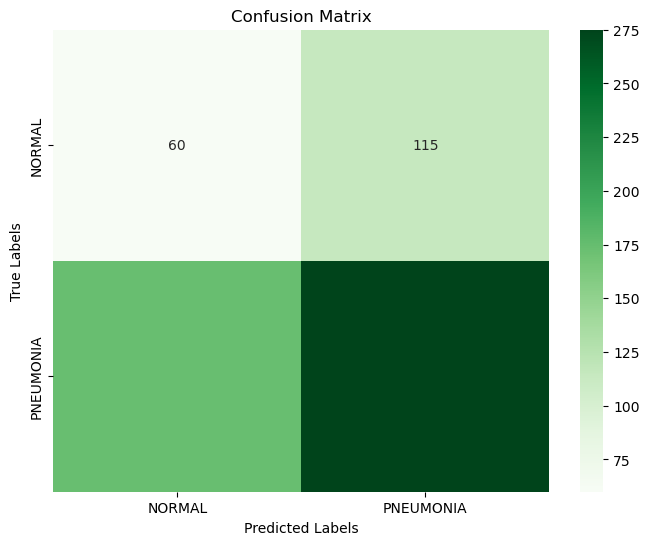

In [34]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Predict on the test data using the trained model
# predictions = model.predict(test_generator)
# predicted_classes = (predictions > 0.5).astype("uint8")


# # Get true labels from the test generator
# true_classes = test_generator.classes
# print(true_classes)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(predicted_classes,true_classes)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", 
#             xticklabels=test_generator.class_indices.keys(), 
#             yticklabels=test_generator.class_indices.keys())
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix")
# plt.show()


In [44]:
eval_result1 = model.evaluate(val_generator, steps=624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])

624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - Precision: 0.9743 - Recall: 0.9512 - accuracy: 0.9467 - loss: 0.1254    
loss  : 0.125601127743721
accuracy  : 0.946513831615448
Precision : 0.974219799041748
Recall : 0.9509933590888977


2024-05-14 21:12:34.652377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


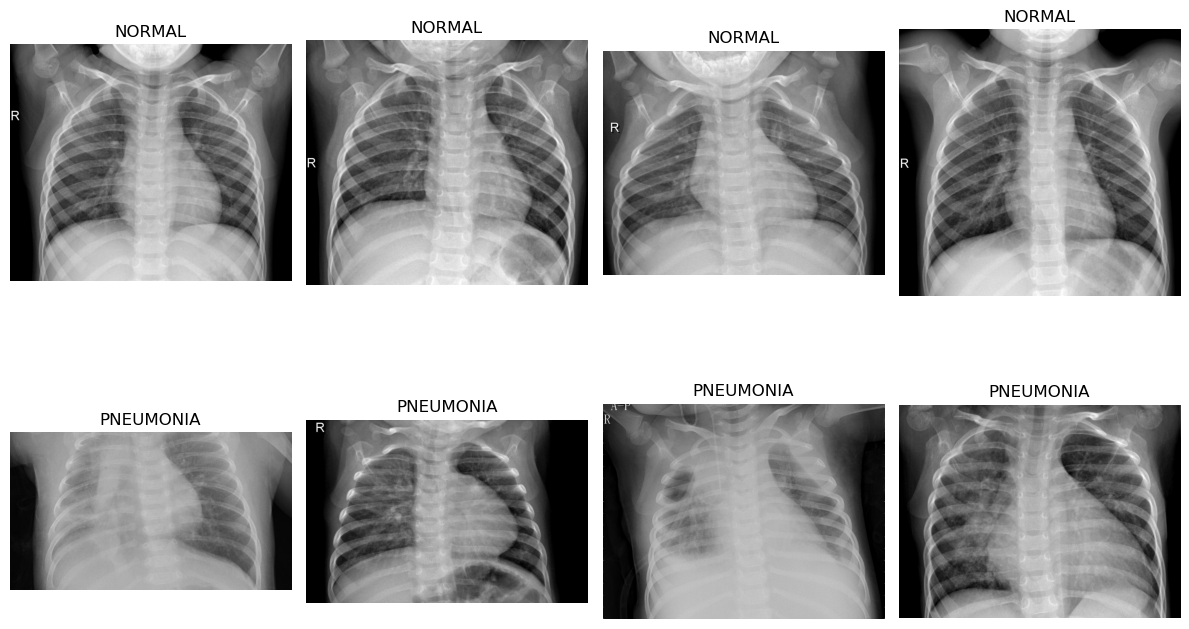

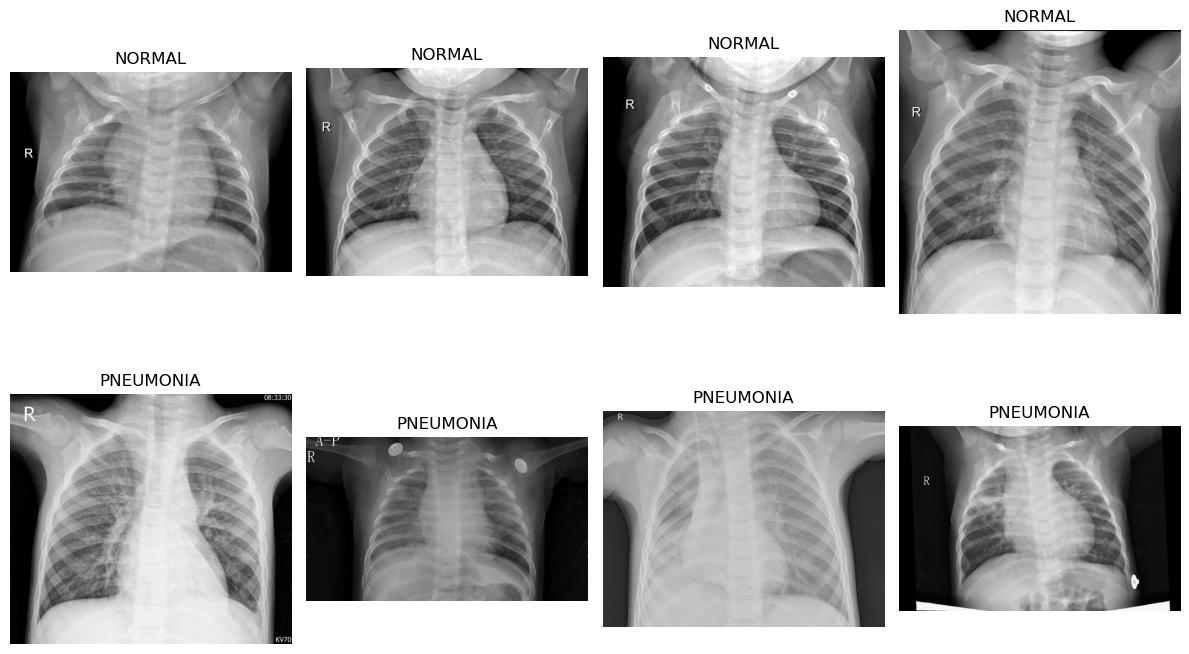

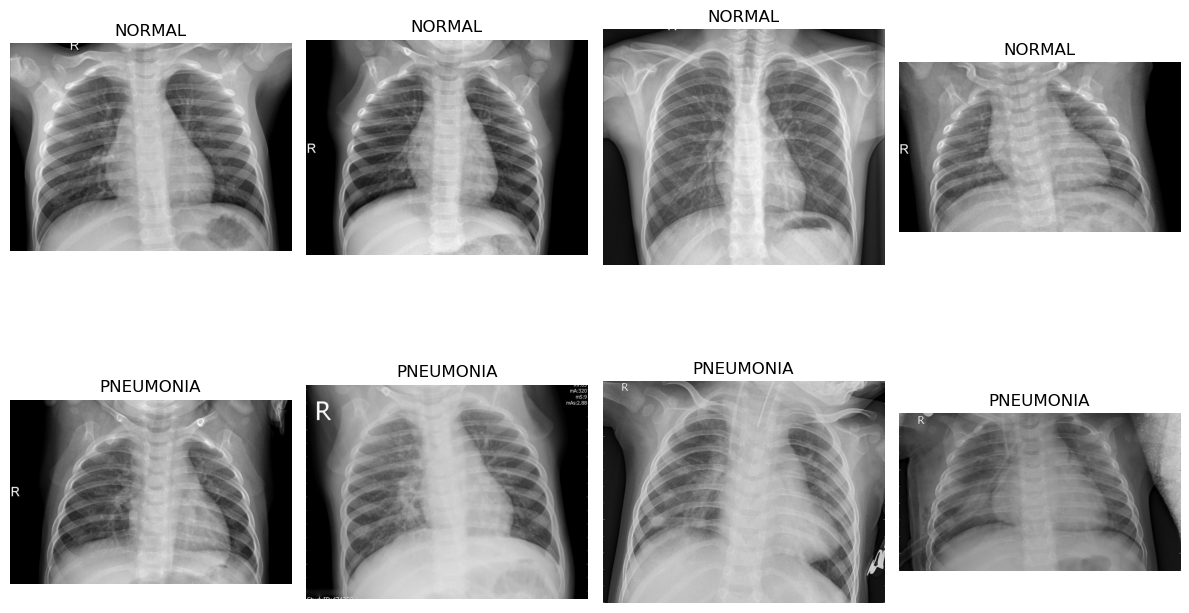

In [45]:
# Function to visualize dataset
def visualize_dataset(directory, class_names, num_images=4):
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        image_files = random.sample(os.listdir(class_dir), num_images)
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_dir, image_file)
            image_data = cv2.imread(image_path)
            image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            plt.imshow(image_data)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize training dataset
visualize_dataset(train_dir, ['NORMAL', 'PNEUMONIA'])

# Visualize validation dataset
visualize_dataset(val_dir, ['NORMAL', 'PNEUMONIA'])

# Visualize test dataset
visualize_dataset(test_dir, ['NORMAL', 'PNEUMONIA'])
